In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.shape

(10000, 14)

In [4]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [5]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
X=pd.concat([X,geography,gender],axis=1)

In [7]:
X=X.drop(['Geography','Gender'],axis=1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Germany          10000 non-null  uint8  
 9   Spain            10000 non-null  uint8  
 10  Male             10000 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 654.4 KB


In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [12]:
# initializing the ANN
classifier= Sequential()


In [13]:
# Adding the input layer and first hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform',activation='relu',input_dim=11))
# classifer.add(Dropout(0.3))
#add the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform',activation='relu'))

#add the output leyer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform',activation ='sigmoid'))

#Compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#fitting the ANN to the Training set
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10 ,epochs=100)

Epoch 1/100
536/536 [==============================] - 3s 3ms/step - loss: 0.6718 - accuracy: 0.6740 - val_loss: 0.5919 - val_accuracy: 0.7959
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 0.5542 - accuracy: 0.7962 - val_loss: 0.5140 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4792 - accuracy: 0.7962 - val_loss: 0.4616 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4430 - accuracy: 0.7962 - val_loss: 0.4442 - val_accuracy: 0.7959
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4305 - accuracy: 0.8022 - val_loss: 0.4375 - val_accuracy: 0.8035
Epoch 6/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4237 - accuracy: 0.8099 - val_loss: 0.4326 - val_accuracy: 0.8031
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4170 - accuracy: 0.8162 - val_loss: 0.4287 - val_accuracy: 0.8118

Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3349 - accuracy: 0.8664 - val_loss: 0.3648 - val_accuracy: 0.8489
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3346 - accuracy: 0.8643 - val_loss: 0.3641 - val_accuracy: 0.8519
Epoch 60/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3348 - accuracy: 0.8625 - val_loss: 0.3643 - val_accuracy: 0.8527
Epoch 61/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3349 - accuracy: 0.8628 - val_loss: 0.3642 - val_accuracy: 0.8519
Epoch 62/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3351 - accuracy: 0.8632 - val_loss: 0.3635 - val_accuracy: 0.8508
Epoch 63/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3338 - accuracy: 0.8643 - val_loss: 0.3638 - val_accuracy: 0.8497
Epoch 64/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3341 - accuracy: 0.8636 - val_loss: 0.3632 - val_accuracy:

In [14]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


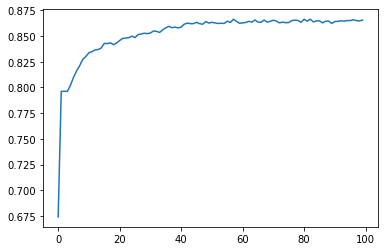

In [17]:
plt.plot(model_history.history['accuracy'])

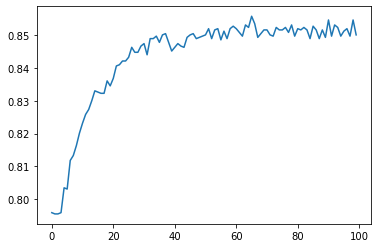

In [18]:
plt.plot(model_history.history['val_accuracy'])

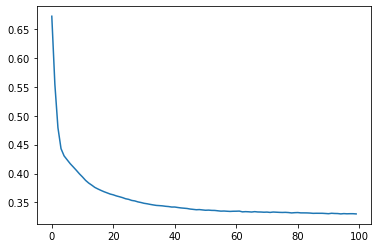

In [19]:
plt.plot(model_history.history['loss'])

In [29]:
#making the prediction and evaluation the model


In [20]:
# predicting the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred > 0.5 )


In [27]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[1503,   92],
       [ 190,  215]], dtype=int64)

In [26]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.859